# <u>Capstone EDA</u>

### **Training EDA Outcomes**

**Null values:** 
- There are 13 null values in the 'Equipment Needed' column. 
- These have occurred when exercises don't require any equipment.
- I have changed these null values to 'None'

**Outliers:**
- 'Jumping Jacks' are an outlier because these require 30 reps per set.
- The threshold for 1.5 x IQR above Q3 is 22.5 so this is significantly above.
- It's also an outlier within it's difficulty level category if you consider the number of calories it burns.
- I will remove this excercise when fitting my model.

**Data types:**
- 'Sets', 'Reps', 'Burns Calories (per 30 min)' --> int
- 'Name of Exercise', 'Benefit', 'Target Muscle Group', 'Equipment Needed', 'Difficulty Level', 'Benefit Category' --> object

**Difficulty:**
- 8 Beginner
- 20 Intermediate
- 12 Advanced

**Equipment Requirements:**
- 16 No equipment required (includes exercises that can be done with or without equipment)
- 24 Equipment required
- If you only have dumbells you can take part in 48% of all exercises.

**Tageted Muscles:**
- The most frequently targeted muscles groups within this training dataset are core, glutes and shoulders.
- 9 target just 1 muscle group
- 19 target 2 muscle groups
- 12 target 3 muscle groups

**Overall Benefits:**
- The exercises in this dataset mainly benefit upper body and core.

**Relationships with Calories Burned:**
- Most exercises burn between 180-280 calories
- The exercises which burn the most calories are burpees, kettlebell swings and thrusters.
- As difficulty level increases so does the number of calories burned (Medians --> Beginner: 163, Intermediate: 210, Advanced: 285).
- The number of calories burned is greater when using equipment (Medians --> No equipment: 195, Equipment: 245).
- In general you burn more calories if you choose to do 4 sets instead of 3 (Medains --> 3 sets: 200, 4 sets: 315)
- The more muscle groups targeted in an exercise, the more calories it burns on average (Medians --> 1 muscle: 185, 2 muscles: 190, 3 muscles: 285)
- **Correlations with 'Burns Calories (per 30 min)':**
    - 'Sets' --> 48% correlation
    - 'Reps' --> -18% correlation
    - 'Number of taget muscles --> 39% correlation
    - 'Equipment Needed 0/1' --> 3% correlation
    - 'Ben Cat Map' --> -65% correlation


In [5]:
# Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [6]:
# Import the dataframe
df = pd.read_csv('Top 50 Excerice for your body.csv')

--- 

## Train Test Splitting

I'd like to stratify the training and testing sets based on the area of the body the exercise targets. This is because I believe it will have a large effect on the number of calories burned so ensuring similar proportions are split acorss both groups is important.

In [10]:
# Create a function to split the 'Benefit' columns into 4 categories - Upper body, Lower body, Full body, Core/balance
# Look through the individual rows and agree the function output with my own categorisation. 

def benefit_cat(benefit):
    
    if any(keyword in benefit for keyword in ['cardiovascular', 'full-body', 'Combines']):
        return 'Full Body'
    
    elif any(keyword in benefit for keyword in ['abs', 'balance', 'abdominal', 'core']) and 'Improves balance and leg strength' not in benefit and 'Builds unilateral leg strength and balance' not in benefit:
        return 'Core/Balance'

    elif any(keyword in benefit for keyword in ['upper', 'chest', 'triceps', 'back', 'biceps', 'shoulder']) and 'Strengthens back and legs' not in benefit:
        return 'Upper Body'
    else:
        return 'Lower Body'

In [11]:
# Split the Benefit column into categories

df1 = df.copy()
df1['Benefit Category'] = df1['Benefit'].apply(benefit_cat)

In [12]:
# Split the data into the training and testing sets now stratifying on Benefit Category

X = df1[['Name of Exercise', 'Sets', 'Reps', 'Benefit', 'Target Muscle Group', 'Equipment Needed', 'Difficulty Level', 'Benefit Category']]
y = df1['Burns Calories (per 30 min)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = df1['Benefit Category'], random_state = 10)

---

## EDA

In [13]:
# Combine the features and target back together

df_train = pd.concat([X_train, y_train], axis = 1)

In [14]:
df_train.head()

,Name of Exercise,Sets,Reps,Benefit,Target Muscle Group,Equipment Needed,Difficulty Level,Benefit Category,Burns Calories (per 30 min)
32,Bulgarian Split Squats,3,10,Improves unilateral leg strength and balance,"Quadriceps, Hamstrings, Glutes",Bench or Step,Advanced,Core/Balance,290
13,Rows,3,12,Improves posture and back strength,"Back, Biceps",Dumbbells or Barbell,Intermediate,Upper Body,260
46,Turkish Get-ups,3,5,Enhances full-body coordination and stability,"Full Body, Core, Shoulders",Kettlebell,Advanced,Full Body,240
12,Bench Press,4,10,Builds chest strength,"Chest, Triceps","Bench, Barbell",Intermediate,Upper Body,280
0,Push-ups,3,15,Builds upper body strength,"Chest, Triceps, Shoulders",NaN,Intermediate,Upper Body,200


In [15]:
df_train.shape

(40, 9)

In [16]:
df_train.dtypes

Name of Exercise               object
Sets                            int64
Reps                            int64
Benefit                        object
Target Muscle Group            object
Equipment Needed               object
Difficulty Level               object
Benefit Category               object
Burns Calories (per 30 min)     int64
dtype: object

In [17]:
df_train.isnull().sum()

Name of Exercise                0
Sets                            0
Reps                            0
Benefit                         0
Target Muscle Group             0
Equipment Needed               13
Difficulty Level                0
Benefit Category                0
Burns Calories (per 30 min)     0
dtype: int64

In [18]:
# Fill in the null values with 'None'
df_train = df_train.fillna(value = 'None').copy()

In [19]:
# Create a binary equipment column --> No equipment needed: 0, Equipment neeeded: 1

df_train['Equipment Needed 0/1'] = df_train['Equipment Needed'].apply(lambda x: 0 if 'None' in x else 1)

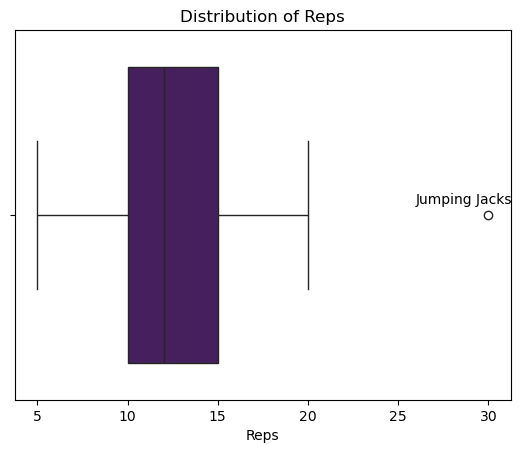

In [20]:
# Look for any outliers in regards to reps

sns.boxplot(x='Reps', data = df_train, color='#481567FF')

# Add title
plt.title('Distribution of Reps')
plt.text(x = 26, y = -0.03, s = 'Jumping Jacks')

plt.show()

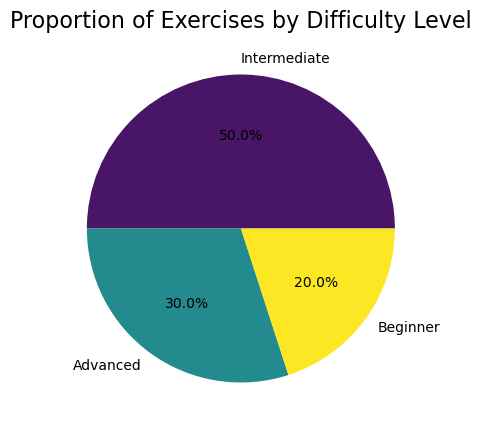

In [21]:
# Create a piechart
plt.figure(figsize = (7, 5))
plt.pie(df_train['Difficulty Level'].value_counts(), labels=df_train['Difficulty Level'].value_counts().index, autopct = '%.1f%%', colors = ['#481567FF', '#238A8DFF', '#FDE725FF'])

# Add titles and labels
plt.title('Proportion of Exercises by Difficulty Level', fontsize = 16)

plt.show()

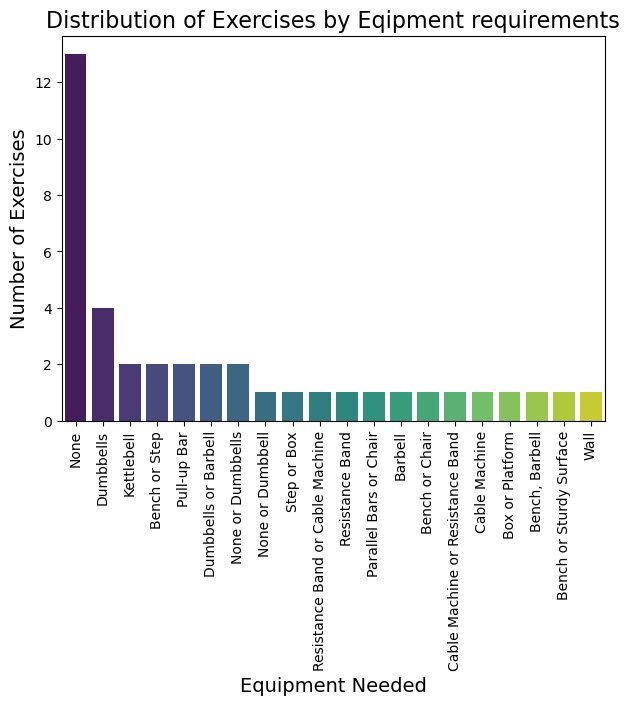

In [22]:
# See the distribution of equipement vs no equipment
equip_df = df_train.groupby('Equipment Needed')[['Name of Exercise']].count().reset_index().rename(columns = {'Name of Exercise': 'Number of Exercises'}).sort_values('Number of Exercises', ascending = False)

# Create a barplot
plt.figure(figsize = (7, 5))
sns.barplot(x = 'Equipment Needed', y = 'Number of Exercises', data = equip_df, hue = 'Equipment Needed', palette = 'viridis')

# Add titles and labels
plt.title('Distribution of Exercises by Eqipment requirements', fontsize = 16)
plt.xlabel('Equipment Needed', fontsize = 14)
plt.ylabel('Number of Exercises', fontsize = 14)
plt.xticks(rotation = 90)

plt.show()

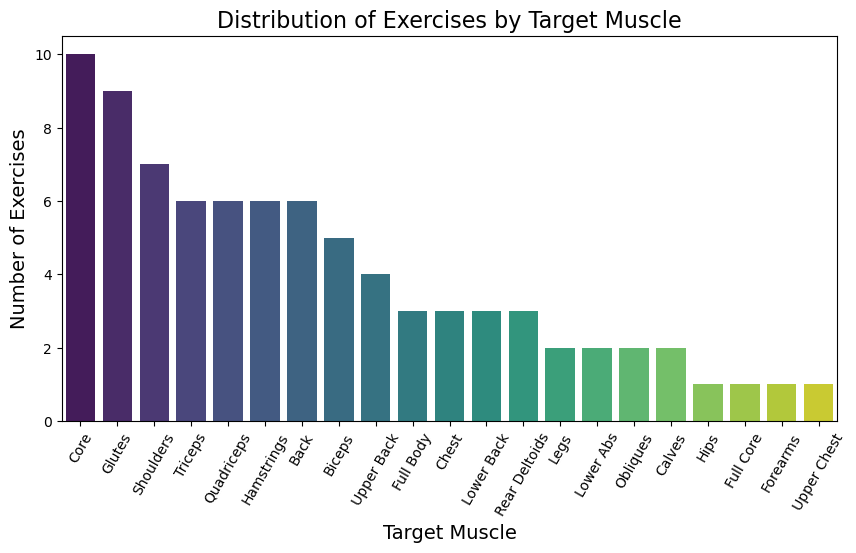

In [23]:
# See the distribution of targeted muscle groups
musc_df = df_train.copy()
musc_df['Target Muscle Group'] = musc_df['Target Muscle Group'].str.split(', ')
musc_df = musc_df.explode('Target Muscle Group', ignore_index=True)
musc_df_ex = musc_df.groupby('Target Muscle Group')['Name of Exercise'].count().reset_index().rename(columns = {'Name of Exercise': 'Number of Exercises'}).sort_values(by = 'Number of Exercises', ascending = False)

# Create a barplot
plt.figure(figsize = (10, 5))
sns.barplot(x = 'Target Muscle Group', y = 'Number of Exercises', data = musc_df_ex, hue = 'Target Muscle Group', palette = 'viridis')

# Add titles and labels
plt.title('Distribution of Exercises by Target Muscle', fontsize = 16)
plt.xlabel('Target Muscle', fontsize = 14)
plt.ylabel('Number of Exercises', fontsize = 14)
plt.xticks(rotation = 60)

plt.show()

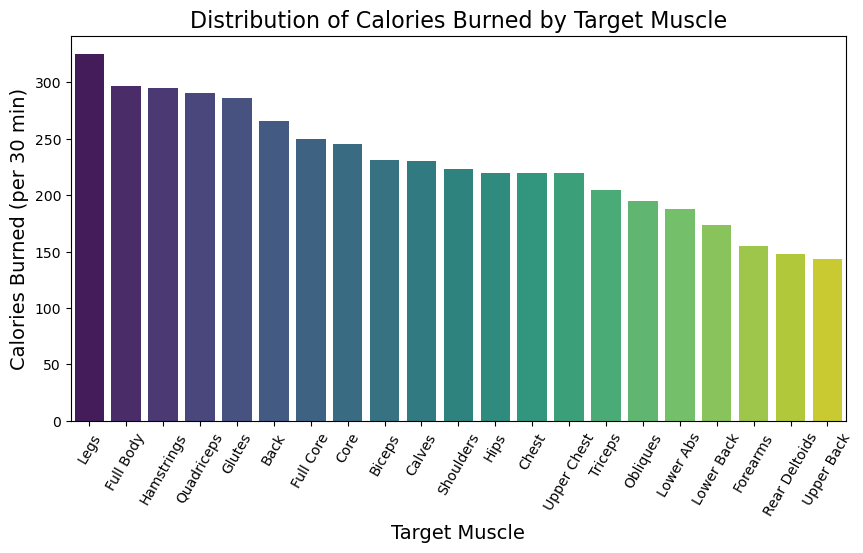

In [24]:
# See the distribution of calories burnt per targeted muscle groups
musc_df_cal = musc_df.groupby('Target Muscle Group')['Burns Calories (per 30 min)'].mean().reset_index().sort_values(by = 'Burns Calories (per 30 min)', ascending = False)

# Create a barplot
plt.figure(figsize = (10, 5))
sns.barplot(x = 'Target Muscle Group', y = 'Burns Calories (per 30 min)', data = musc_df_cal, hue = 'Target Muscle Group', palette = 'viridis')

# Add titles and labels
plt.title('Distribution of Calories Burned by Target Muscle', fontsize = 16)
plt.xlabel('Target Muscle', fontsize = 14)
plt.ylabel('Calories Burned (per 30 min)', fontsize = 14)
plt.xticks(rotation = 60)

plt.show()

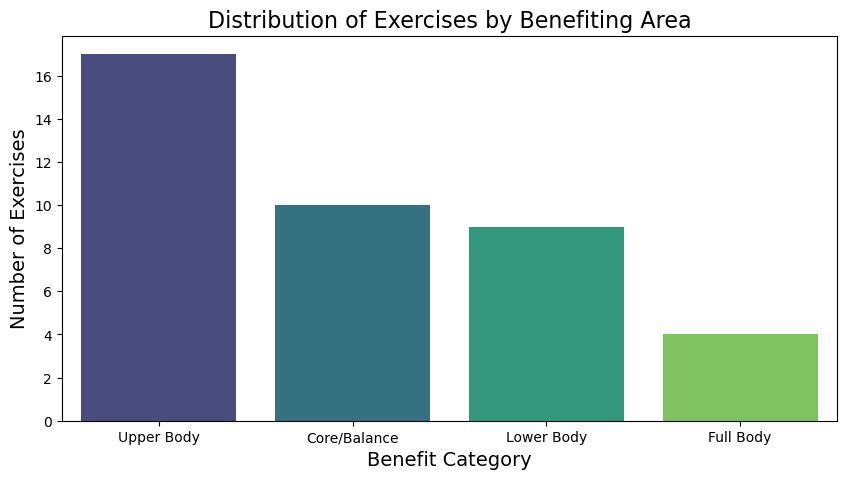

In [25]:
# See the distribution of Benefit categories
benef_df_ex = df_train.groupby('Benefit Category')[['Name of Exercise']].count().reset_index().rename(columns = {'Name of Exercise': 'Number of Exercises'}).sort_values(by = 'Number of Exercises', ascending = False)

# Create a barplot
plt.figure(figsize = (10, 5))
sns.barplot(x = 'Benefit Category', y = 'Number of Exercises', data = benef_df_ex, hue = 'Benefit Category', palette = 'viridis')

# Add titles and labels
plt.title('Distribution of Exercises by Benefiting Area', fontsize = 16)
plt.xlabel('Benefit Category', fontsize = 14)
plt.ylabel('Number of Exercises', fontsize = 14)

plt.show()

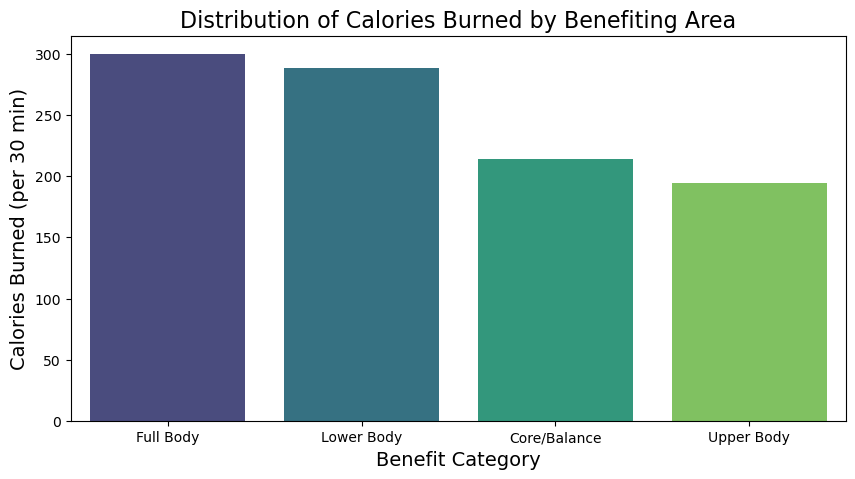

In [26]:
# See the distribution of calories burnt per benefit category
benef_df_cal = df_train.groupby('Benefit Category')[['Burns Calories (per 30 min)']].mean().reset_index().sort_values(by = 'Burns Calories (per 30 min)', ascending = False)

# Create a barplot
plt.figure(figsize = (10, 5))
sns.barplot(x = 'Benefit Category', y = 'Burns Calories (per 30 min)', data = benef_df_cal, hue = 'Benefit Category', palette = 'viridis')

# Add titles and labels
plt.title('Distribution of Calories Burned by Benefiting Area', fontsize = 16)
plt.xlabel('Benefit Category', fontsize = 14)
plt.ylabel('Calories Burned (per 30 min)', fontsize = 14)

plt.show()

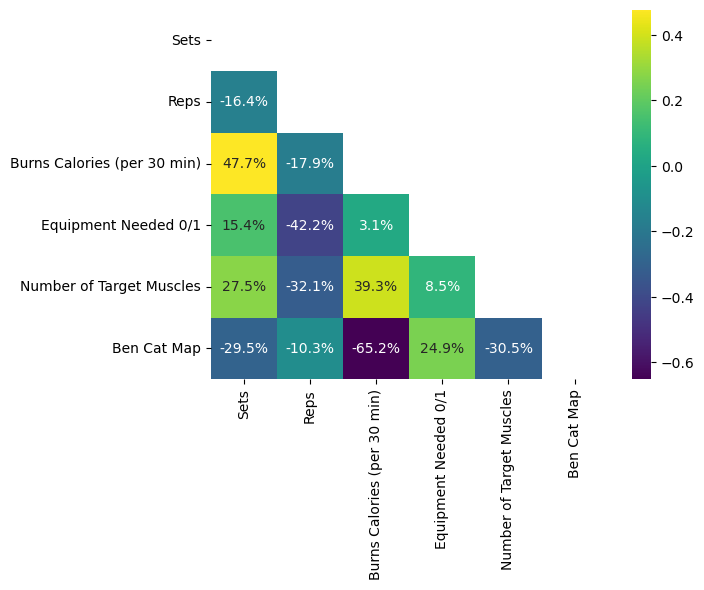

In [27]:
# Visualise the correlations between the numerical variables with calories burnt
df_train['Number of Target Muscles'] = df_train['Target Muscle Group'].str.split(', ').apply(lambda x: len(x))
df_train['Ben Cat Map'] = df_train['Benefit Category'].map({'Full Body':0, 'Lower Body':1, 'Core/Balance':2, 'Upper Body':3})

sns.heatmap(df_train.corr(numeric_only = True),
           cmap = 'viridis',
           annot = True,
           fmt = '0.1%',
           mask = np.triu(df_train.corr(numeric_only = True)))  

plt.show()

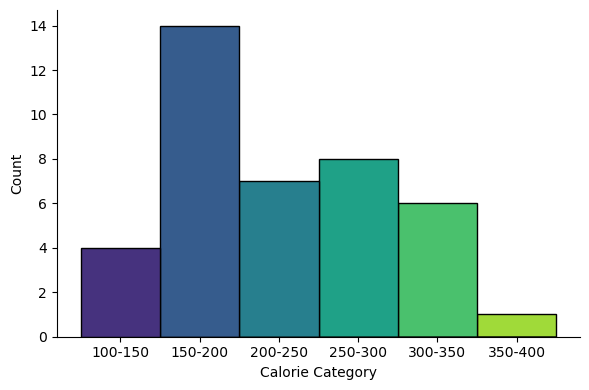

In [28]:
# Look at the distribution of calories burnt per 30 mins

calorie_buckets = [100, 150, 200, 250, 300, 350, 400]
calorie_bucket_name = ['100-150', '150-200', '200-250', '250-300', '300-350', '350-400']
df_train['Calorie Category'] = pd.cut(df_train['Burns Calories (per 30 min)'],
                                bins = calorie_buckets,
                                labels = calorie_bucket_name,
                                include_lowest = True)

sns.displot(data = df_train, x = 'Calorie Category', hue = 'Calorie Category', palette = 'viridis', legend = False, height = 4, aspect = 1.5, alpha = 1)

plt.show()

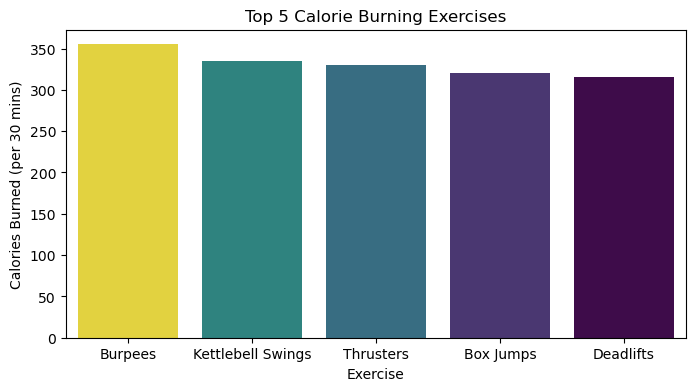

In [29]:
# Look at the top 5 calorie burning exercises

most_calories = df_train.sort_values(by = 'Burns Calories (per 30 min)', ascending = False).head()

plt.figure(figsize = (8,4))
sns.barplot(data = most_calories, 
            x = 'Name of Exercise', 
            y = 'Burns Calories (per 30 min)', 
            hue = 'Burns Calories (per 30 min)', 
            palette = 'viridis',
            legend = False)
plt.title('Top 5 Calorie Burning Exercises')
plt.xlabel('Exercise')
plt.ylabel('Calories Burned (per 30 mins)')

plt.show()

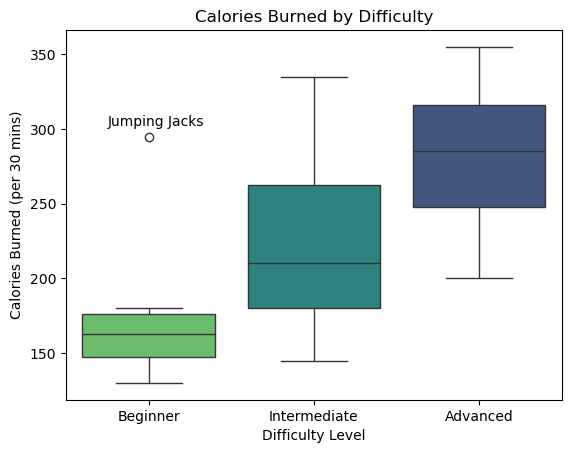

In [30]:
# Explore the relationship between calories burned and difficulty level

sns.boxplot(data = df_train, x = 'Difficulty Level', y = 'Burns Calories (per 30 min)', hue = 'Difficulty Level', palette = 'viridis', order = ['Beginner', 'Intermediate', 'Advanced'])
plt.title('Calories Burned by Difficulty')
plt.ylabel('Calories Burned (per 30 mins)')
plt.text(x = -0.25, y = 302, s = 'Jumping Jacks')

plt.show()

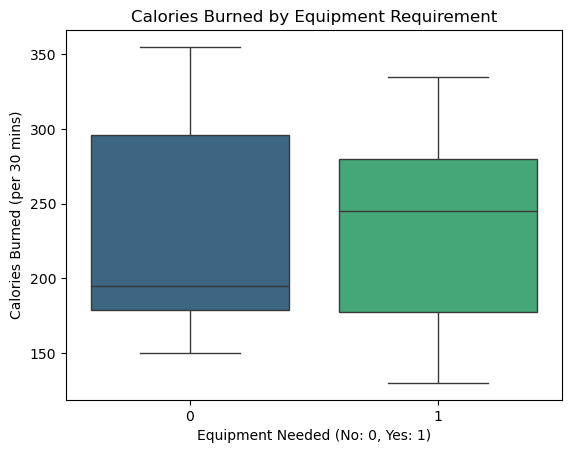

In [31]:
# Explore the relationship between calories burned and equipment requirement

sns.boxplot(data = df_train, x = 'Equipment Needed 0/1', y = 'Burns Calories (per 30 min)', hue = 'Equipment Needed 0/1', palette = 'viridis', legend = False)
plt.title('Calories Burned by Equipment Requirement')
plt.xlabel('Equipment Needed (No: 0, Yes: 1)')
plt.ylabel('Calories Burned (per 30 mins)')

plt.show()

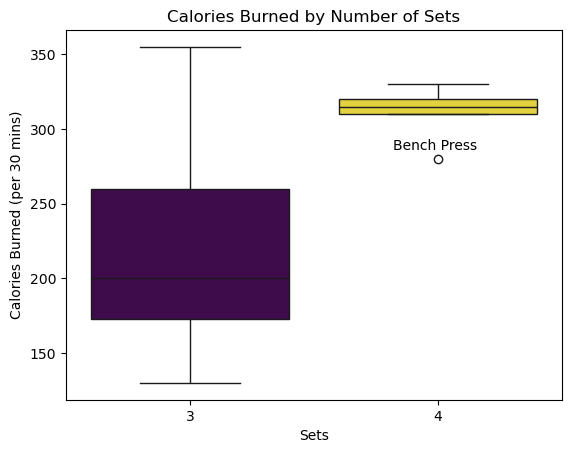

In [32]:
# Explore the relationship between calories burned and number of sets

sns.boxplot(data = df_train, x = 'Sets', y = 'Burns Calories (per 30 min)', hue = 'Sets', palette = 'viridis', legend = False)
plt.title('Calories Burned by Number of Sets')
plt.ylabel('Calories Burned (per 30 mins)')
plt.text(x = 0.82, y = 286, s = 'Bench Press')

plt.show()

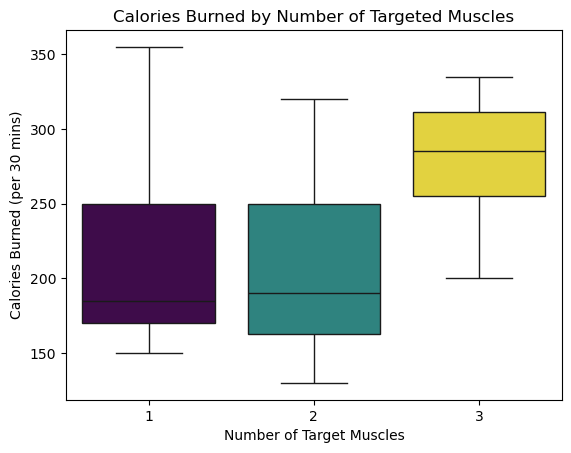

In [33]:
# Explore the relationship between calories burned and number of targeted muscles

sns.boxplot(data = df_train, x = 'Number of Target Muscles', y = 'Burns Calories (per 30 min)', hue = 'Number of Target Muscles', palette = 'viridis', legend = False)
plt.title('Calories Burned by Number of Targeted Muscles')
plt.ylabel('Calories Burned (per 30 mins)')

plt.show()